In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from aquarel import load_theme
from matplotlib.ticker import MultipleLocator

In [2]:
# load csv
path = 'amplitude_phase.csv'
df = pd.read_csv(path)
df.head()

Alpha Accuracy（cifar10，ipc1） Accuracy（cifar10，ipc10）  \
0  0.001               43.4±0.6                65.2±0.3   
1  0.010               43.4±0.5                64.8±0.3   
2  0.100               43.9±0.7                65.5±0.4   
3  0.200               43.8±0.7                65.5±0.2   
4  0.250               43.7±0.6                65.6±0.3   

  Accuracy（cifar100，ipc1） Accuracy（cifar100，ipc10）  
0                24.9±0.3                 44.1±0.4  
1                24.9±0.3                 43.7±0.3  
2                25.3±0.4                 45.0±0.3  
3                25.3±0.2                 44.1±0.3  
4                25.2±0.3                 45.7±0.2

In [4]:
labels = df.columns[1:]
labels = [label.replace('Accuracy','').replace('（','').replace('）', '').replace('，',' ') for label in labels]
data = df.values[:,1:]
alphas = df.iloc[:,0].values
baselines = [26.8, 48.9, 11.4, 29.7]
alphas

array([0.001, 0.01 , 0.1  , 0.2  , 0.25 , 0.33 , 0.5  , 0.67 , 0.75 ,
       0.8  , 0.9  , 0.99 , 0.999])

13


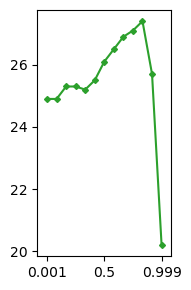

In [4]:
# plot alpha with accuracy for each dataset line plot
markers = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'h', 'H', 'd', 'P', 'X']
colors = sns.color_palette('tab10', n_colors=len(labels))
selected = [0,6,-1]
print(len(alphas))
for dataset in range(data.shape[1]):
    # with load_theme('boxy_light'):
    plt.figure(figsize=(2, 3))
    x = np.arange(1, data.shape[0]+1)
    x_ticks = alphas
    y = data[:,dataset]
    y = [float(d.split('±')[0]) for d in y]
    plt.plot(x, y, label=labels[dataset], marker=markers[dataset], markersize=3, color=colors[dataset])
    # plt.plot(x, [baselines[dataset]]*len(x), linestyle='--', color='gray')
    # x_extend = [0] + list(x)
    # y_extend = [baselines[dataset]] + list(y)
    # plt.bar(x_extend, y_extend, label=labels[dataset])
    # plt.ylim(bottom=min(y_extend)-1)
    # plt.legend()
    # plt.xlabel('Fraction of Amplitude Loss')
    # plt.ylabel('Accuracy (%)')
    # only remain 3 ticks in y, but in integer
    # plt.yticks(np.linspace(round(min(y))-1, round(max(y))+1, 3))
    plt.xticks(x[selected], x_ticks[selected])
    # MultipleLocator
    k = (round(max(y))+1-round(min(y))-1)//3
    plt.gca().yaxis.set_major_locator(MultipleLocator(k))
    plt.xlim(0, len(x)+1)
    plt.tight_layout()
    plt.savefig(f'amplitude_phase_{labels[dataset]}.svg')
    plt.show()